In [6]:
import numpy as np
from pathlib import Path
import os
import re
import h5py
import pandas as pd
import logging
import pickle

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

from sklearn.metrics import pairwise_distances
from graspy.plot import pairplot, heatmap
from hyppo.ksample._utils import k_sample_transform

import sys; sys.path.append('../')
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
datadir = Path('/mnt/ssd3/ronan/data')
tag = '_min_rank-ZG3'#'_max_rank-ZG2' 
gccadir = datadir / f'gcca_05-26-10:39{tag}'#f'gcca_05-17-18:27{tag}' # 

In [17]:
groups, labels, subjs = get_latents(gccadir, flag="_gcca", ids=True)

## Analyze gradient

In [10]:
grad = 2

In [22]:
ways = [[0], [0], [0], [1], [1], [1]]
X, Y = k_sample_transform(groups, ways=ways)
X = X[:, :, grad].reshape(X.shape[0], -1)

X_dists = pairwise_distances(X, metric="euclidean")
Y_dists = pairwise_distances(Y, metric="sqeuclidean")

subjs = np.hstack(subjs)

In [25]:
sort_idx = np.argsort(subjs)

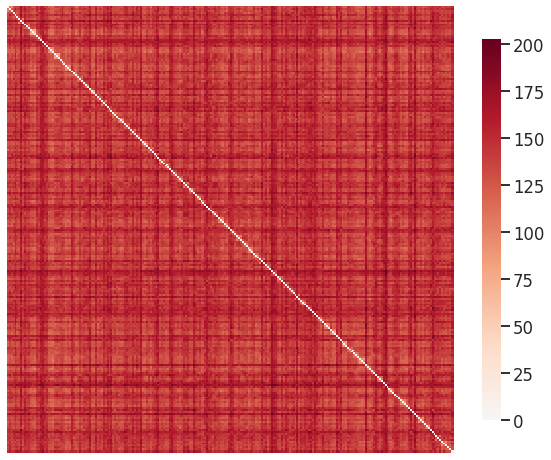

In [26]:
heatmap(X_dists[sort_idx][:,sort_idx])